<a href="https://colab.research.google.com/github/juanestebanperezm/salud_mental_eda/blob/main/datos_salud_mental_estudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv('/content/Student Mental health.csv')



df.rename(columns={"Your current year of Study":"semestre","Marital status":"estado civil","What is your course?":"carrera",'Choose your gender':'genero','Do you have Depression?':'depresivo','Do you have Anxiety?':'ansiedad',"Do you have Panic attack?":'panico','Did you seek any specialist for a treatment?':'tratamiento'},inplace=True)





,Timestamp,genero,Age,carrera,semestre,What is your CGPA?,estado civil,depresivo,ansiedad,panico,tratamiento
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


<h1>Cual es el genero que mas padece deprenderlo 🎃</h1>

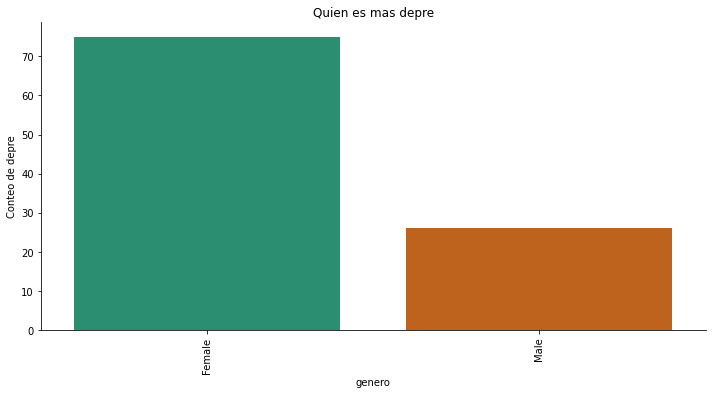

In [ ]:
quien_es_mas_depre=df[['genero','depresivo']].groupby('genero').count().reset_index().sort_values(by='genero',ascending=True)


sns.catplot(data=quien_es_mas_depre,
            x='genero',
            y='depresivo',
            kind='bar',
            palette='Dark2',
            aspect=2)
plt.title("Quien es mas depre")
plt.xticks(rotation=90)
plt.ylabel('Conteo de depre')
plt.xlabel('genero')
plt.show()

<h1>Carreras con mas depresivos </h1>

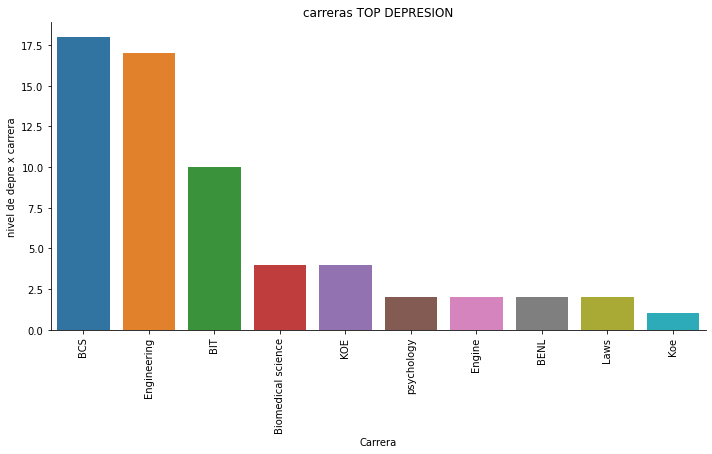

In [ ]:
carrera_mas_depre=df[['carrera','depresivo']].groupby("carrera").count().sort_values(by="depresivo",ascending=False).reset_index().head(10)

sns.catplot(data=carrera_mas_depre,x='carrera',y='depresivo',kind='bar',aspect=2)
plt.title('carreras TOP DEPRESION')
plt.xticks(rotation=90)
plt.xlabel('Carrera')
plt.ylabel('nivel de depre x carrera')
plt.show()

#BCS Bacheloor of computer science Licenciado en Ciencias de la Computación
#BIT Licenciatura en Tecnología de la Información
#Ingenieria 


<h1> Oe ya todo el mundo padece de todo? si o que? yo no se, yo no soy sicologo nea </h1>

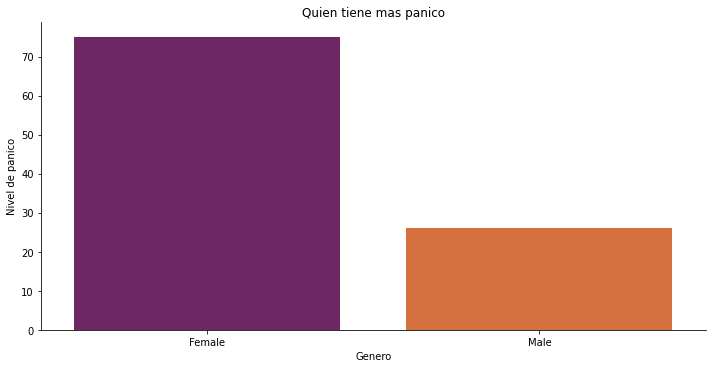

In [ ]:
panico=df[['genero','panico']].groupby('genero').count().reset_index()

sns.catplot(x='genero',y='panico',data=panico,aspect=2,palette='inferno',kind='bar')
plt.title('Quien tiene mas panico')
plt.xlabel('Genero')
plt.ylabel('Nivel de panico')
plt.show()

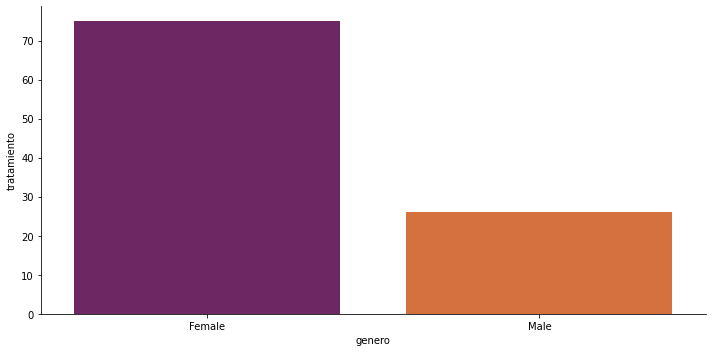

In [ ]:
tratamiento_=df[['genero','tratamiento']].groupby('genero').count().reset_index()

sns.catplot(data=tratamiento_,x='genero',y='tratamiento',kind='bar',aspect=2,palette='inferno')

<h1>Chimbadas mas comunes en los estudiantes <h1>

In [ ]:
df2=pd.read_csv("/content/Student Mental health.csv")
df2.columns
for i in list(df2.columns):
    df2 = df2.replace({str(i): {'Yes': True,'No': False}})

depression = list(df2['Do you have Depression?'])
anxiety = list(df2['Do you have Anxiety?'])
panic_attacks = list(df2['Do you have Panic attack?'])

result = list(zip(depression, anxiety, panic_attacks))

dap = []
for i in result:
    if any(i):
        dap.append(True)
    elif any(i) == False:
        dap.append(False)
    else:
        print("Problem")


illness_name = ['depresivo', 'ansiedad', 'panico', "no daps", "daps"]
illness = [sum(depression), sum(anxiety), sum(panic_attacks), len(df2)-sum(dap), sum(dap)]
illness_count = list(zip(illness_name, illness))
illness_count

[('depresivo', 35),
 ('ansiedad', 34),
 ('panico', 33),
 ('no daps', 37),
 ('daps', 64)]

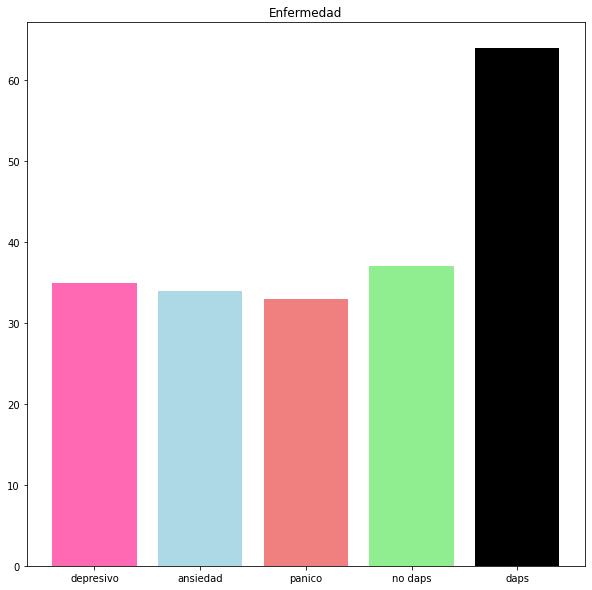

In [ ]:
plt.figure(figsize=(10,10))
colors = "hotpink","lightblue","lightcoral","lightgreen","black"
plt.bar(illness_name,illness, color = colors)
plt.title("Enfermedad")
plt.show()


<h1>Estado civil de los depre</h1>

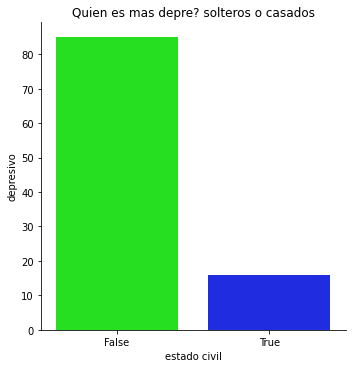

In [ ]:
depre_c=df[['estado civil','depresivo']].groupby('estado civil').count().reset_index()


sns.catplot(x='estado civil',y='depresivo',data=depre_c,kind='bar',aspect=1,palette='hsv')

plt.title('Quien es mas depre? solteros o casados')
plt.show()